In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from google.cloud import bigquery
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="thinking-cacao-379915-7e06281a09dd.json" # lokalizacja pobranego klucza z punktu 1.4.
client = bigquery.Client() 
pd.set_option('display.max_columns', None)
dfdf = pd.read_csv("zad1.1.csv")
dfdf


,country_name,population,area_sq_km,population_density,gdp_per_capita_usd,gdp_usd
0,Brazil,212559409,8515770,25.431,8717,1839758040765
1,New Zealand,4822233,267710,18.314,42084,206928765543
2,Curaçao,164100,444,369.595,19573,3127908044
3,Faroe Islands,48865,1396,35.004,58622,2833300519
4,Guinea,13132792,245860,53.446,1064,13590281808
...,...,...,...,...,...,...
198,East Timor,1318442,14870,88.665,1294,1673540300
199,Tunisia,11818618,163610,76.072,3317,38797709923
200,Tonga,105697,750,146.801,4364,450353313
201,Trinidad and Tobago,1399491,5130,272.805,17276,24100202833


<Axes: title={'center': 'confirmed_cases filtered'}>

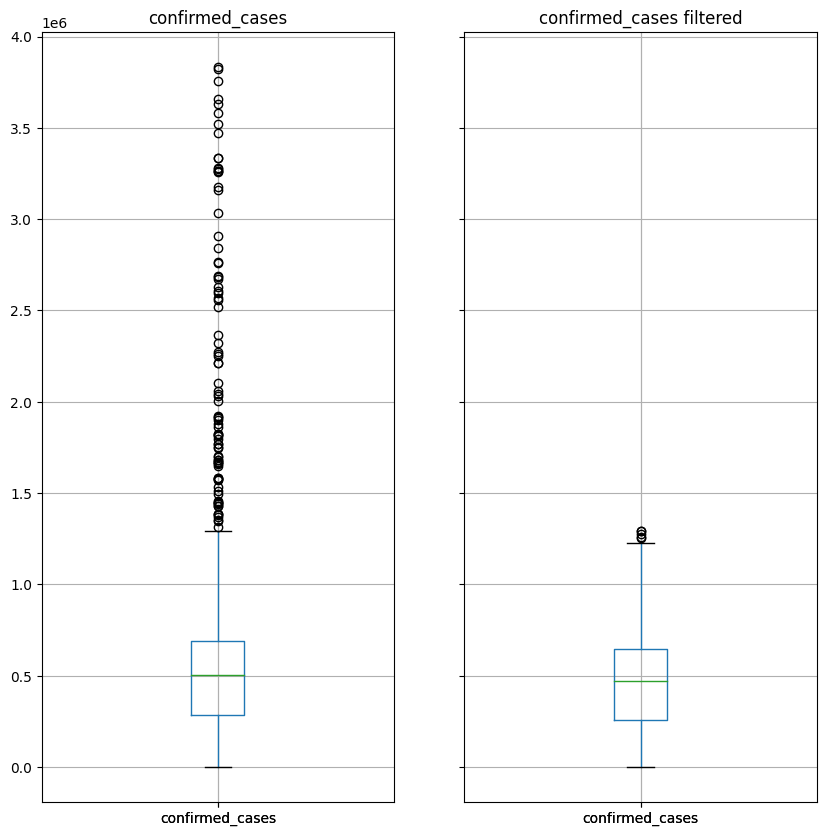

In [16]:
# (Dodatkowo: Wybierz jedną z metod obliczania outlierów oraz usuń wartości odstające)
# Wykonaj wykresy pudełkowe (ang.box plot), które pozwolą na graficzną identyfikację wartości odstających poprzez 
# przedstawienie kwartyli i wartości skrajnych w danych dotyczących:
#1.1 liczby nowych zachorowań
q = ("SELECT date, SUM(new_confirmed) AS confirmed_cases, SUM(new_deceased) AS deaths, SUM(new_recovered) AS recovered, SUM(new_confirmed) - SUM(new_deceased) - SUM(new_recovered) AS active_cases FROM `bigquery-public-data.covid19_open_data.covid19_open_data` WHERE aggregation_level = 0 GROUP BY date ORDER BY date")
query_job = client.query(q)
query_result = query_job.result()
df = query_result.to_dataframe().dropna().drop_duplicates()
df

column_name = "confirmed_cases"
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10), sharex = True, sharey = True)
ax[0].set_title(f"{column_name}")
ax[1].set_title(f"{column_name} after_reduction")
df.boxplot(ax = ax[0], column=column_name)

q1 = df[column_name].quantile(0.25)
q3 = df[column_name].quantile(0.75)
q_difference = q3 - q1
after_reduction = df.query(f'(@q1 - 1.5 * @q_difference) <= {column_name} <= (@q3 + 1.5 * @q_difference)')

after_reduction.boxplot(ax = ax[1], column=column_name)

<Axes: title={'center': 'deaths after_reduction'}>

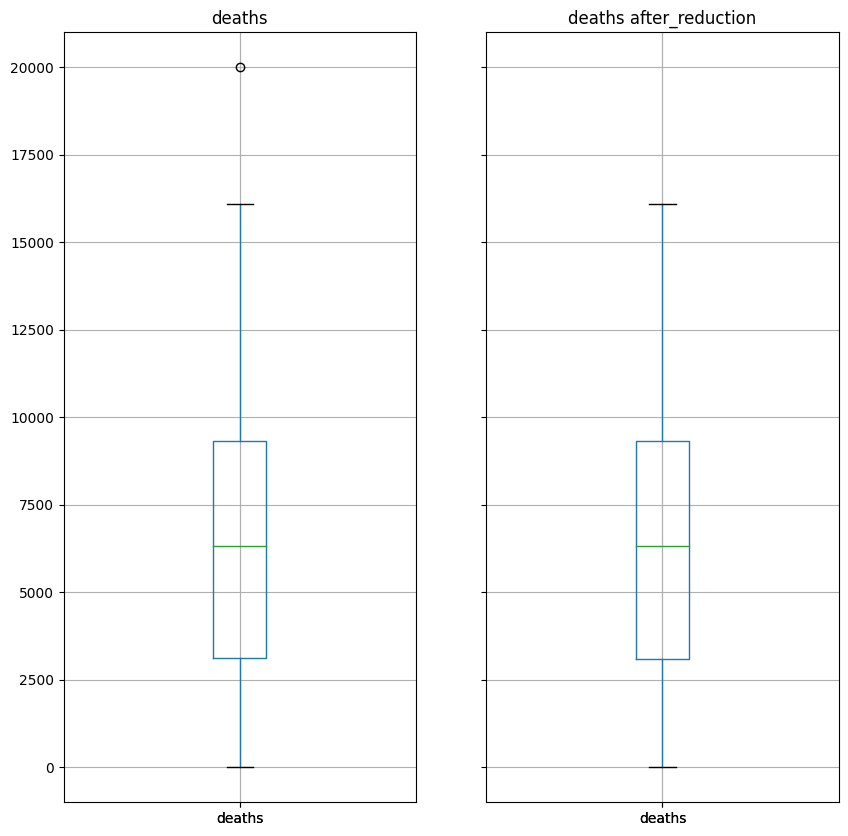

In [4]:
#1.2 liczby nowych śmierci
q = ("SELECT date, SUM(new_confirmed) AS confirmed_cases, SUM(new_deceased) AS deaths, SUM(new_recovered) AS recovered, SUM(new_confirmed) - SUM(new_deceased) - SUM(new_recovered) AS active_cases FROM `bigquery-public-data.covid19_open_data.covid19_open_data` WHERE aggregation_level = 0 GROUP BY date ORDER BY date")
query_job = client.query(q)
query_result = query_job.result()
df = query_result.to_dataframe().dropna().drop_duplicates()
df

column_name = "deaths"
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10), sharex = True, sharey = True)
ax[0].set_title(f"{column_name}")
ax[1].set_title(f"{column_name} after_reduction")
df.boxplot(ax = ax[0], column=column_name)

q1 = df[column_name].quantile(0.25)
q3 = df[column_name].quantile(0.75)
q_difference = q3 - q1
after_reduction = df.query(f'(@q1 - 1.5 * @q_difference) <= {column_name} <= (@q3 + 1.5 * @q_difference)')

after_reduction.boxplot(ax = ax[1], column=column_name)

<Axes: title={'center': 'people_vaccinated filtered'}>

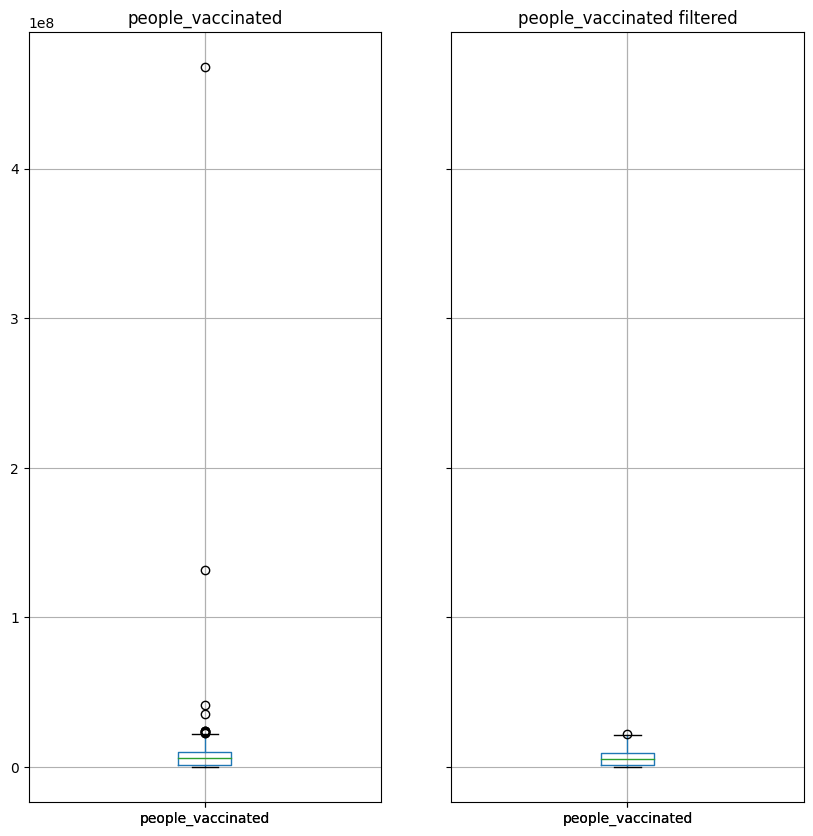

In [20]:
#1.3 liczby nowych szczepień
q = ("SELECT date, SUM(new_persons_vaccinated) as people_vaccinated, SUM(new_persons_fully_vaccinated) as people_fully_vaccinated FROM `bigquery-public-data.covid19_open_data.covid19_open_data` WHERE aggregation_level = 0 GROUP BY date ORDER BY date")
query_job = client.query(q)
query_result = query_job.result()
df = query_result.to_dataframe().dropna().drop_duplicates()
df

column_name = "people_vaccinated"
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10), sharex = True, sharey = True)
ax[0].set_title(f"{column_name}")
ax[1].set_title(f"{column_name} after_reduction")
df.boxplot(ax = ax[0], column=column_name)

q1 = df[column_name].quantile(0.25)
q3 = df[column_name].quantile(0.75)
q_difference = q3 - q1
after_reduction = df.query(f'(@q1 - 1.5 * @q_difference) <= {column_name} <= (@q3 + 1.5 * @q_difference)')

after_reduction.boxplot(ax = ax[1], column=column_name)

<Axes: title={'center': 'population filtered'}>

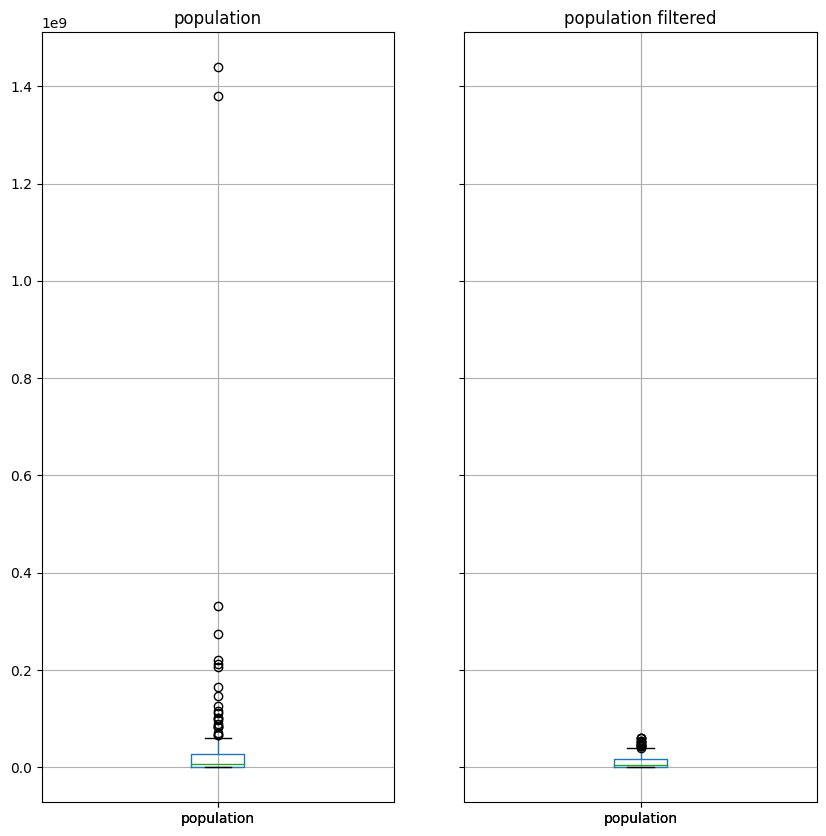

In [4]:
#1.4 populacji
df = pd.read_csv("zad1.1.csv")

column_name = "population"
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10), sharex = True, sharey = True)
ax[0].set_title(f"{column_name}")
ax[1].set_title(f"{column_name} after_reduction")
df.boxplot(ax = ax[0], column=column_name)

q1 = df[column_name].quantile(0.25)
q3 = df[column_name].quantile(0.75)
q_difference = q3 - q1
after_reduction = df.query(f'(@q1 - 1.5 * @q_difference) <= {column_name} <= (@q3 + 1.5 * @q_difference)')

after_reduction.boxplot(ax = ax[1], column=column_name)

<Axes: title={'center': 'gdp_usd filtered'}>

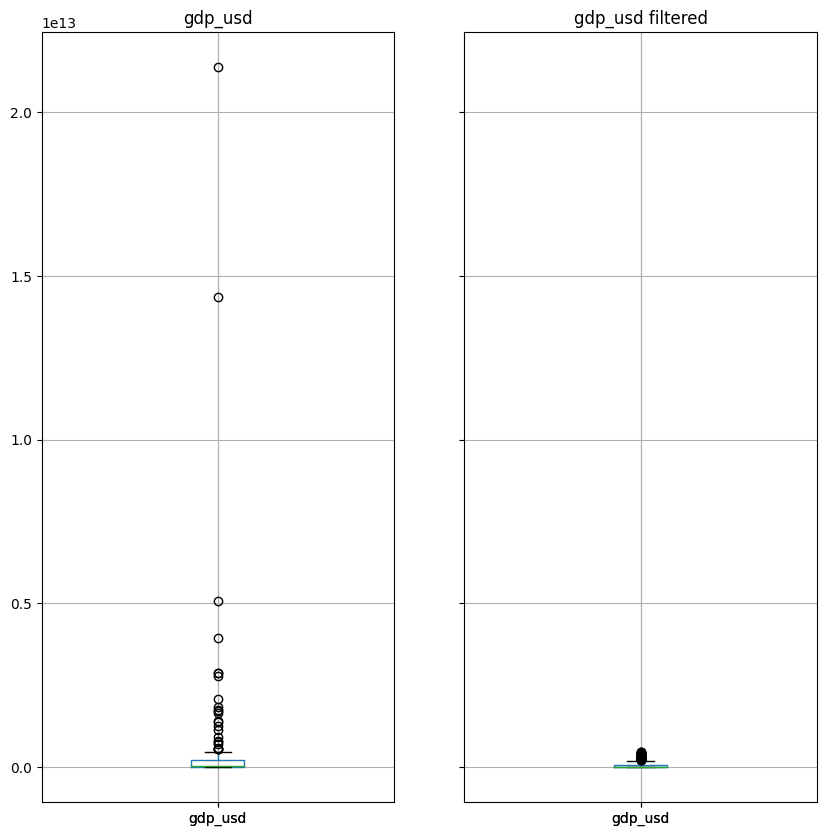

In [5]:
#1.5 PKB
df = pd.read_csv("zad1.1.csv")

column_name = "gdp_usd"
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10), sharex = True, sharey = True)
ax[0].set_title(f"{column_name}")
ax[1].set_title(f"{column_name} after_reduction")
df.boxplot(ax = ax[0], column=column_name)

q1 = df[column_name].quantile(0.25)
q3 = df[column_name].quantile(0.75)
q_difference = q3 - q1
after_reduction = df.query(f'(@q1 - 1.5 * @q_difference) <= {column_name} <= (@q3 + 1.5 * @q_difference)')

after_reduction.boxplot(ax = ax[1], column=column_name)

<Axes: title={'center': 'gdp_per_capita_usd filtered'}>

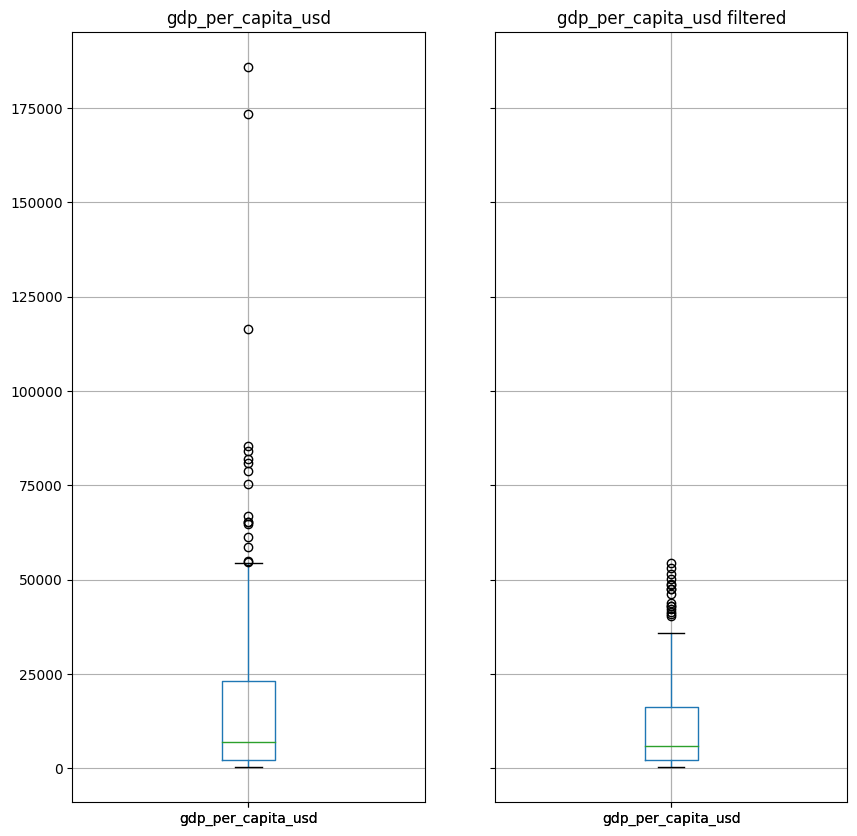

In [7]:
#1.6 gdp_per_capita_usd
df = pd.read_csv("zad1.1.csv")

column_name = "gdp_per_capita_usd"
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10), sharex = True, sharey = True)
ax[0].set_title(f"{column_name}")
ax[1].set_title(f"{column_name} after_reduction")
df.boxplot(ax = ax[0], column=column_name)

q1 = df[column_name].quantile(0.25)
q3 = df[column_name].quantile(0.75)
q_difference = q3 - q1
after_reduction = df.query(f'(@q1 - 1.5 * @q_difference) <= {column_name} <= (@q3 + 1.5 * @q_difference)')

after_reduction.boxplot(ax = ax[1], column=column_name)

<Axes: title={'center': 'hospitalized filtered'}>

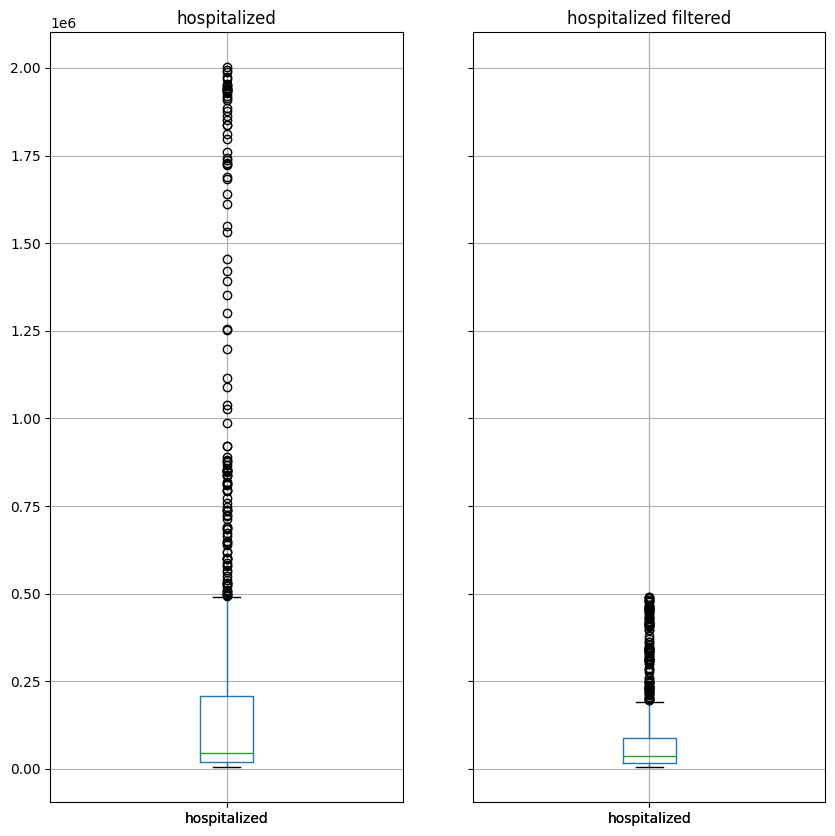

In [8]:
#1.7 ilość hospitalizowanych osób
q = q = ("SELECT date, SUM(new_confirmed) as confirmed, SUM(new_hospitalized_patients) as hospitalized, SUM(new_hospitalized_patients)/SUM(new_confirmed)*100 as hospitalized_to_confirmed_ratio, FROM `bigquery-public-data.covid19_open_data.covid19_open_data` WHERE aggregation_level = 0 AND date > '2020-04-10' AND date < '2022-09-14' GROUP BY date ORDER BY date")
query_job = client.query(q)
query_result = query_job.result()
df = query_result.to_dataframe().dropna().drop_duplicates()
df

column_name = "hospitalized"
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10), sharex = True, sharey = True)
ax[0].set_title(f"{column_name}")
ax[1].set_title(f"{column_name} after_reduction")
df.boxplot(ax = ax[0], column=column_name)

q1 = df[column_name].quantile(0.25)
q3 = df[column_name].quantile(0.75)
q_difference = q3 - q1
after_reduction = df.query(f'(@q1 - 1.5 * @q_difference) <= {column_name} <= (@q3 + 1.5 * @q_difference)')

after_reduction.boxplot(ax = ax[1], column=column_name)

<Axes: title={'center': 'people_fully_vaccinated filtered'}>

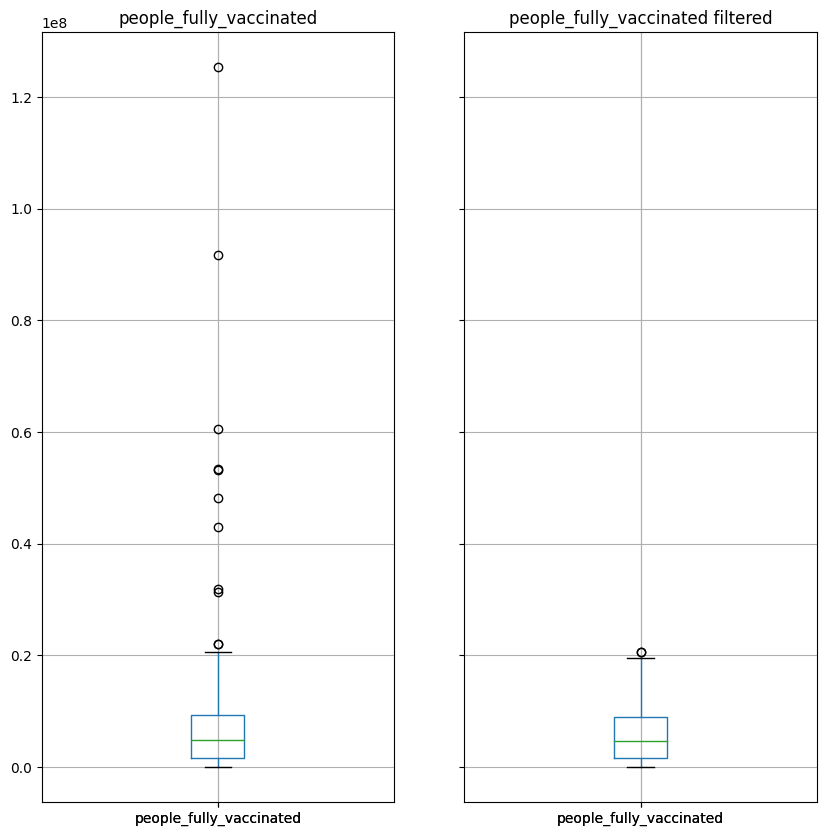

In [9]:
#1.8 ilość ludzi w pełni zaszczepionych
q = ("SELECT date, SUM(new_persons_vaccinated) as people_vaccinated, SUM(new_persons_fully_vaccinated) as people_fully_vaccinated FROM `bigquery-public-data.covid19_open_data.covid19_open_data` WHERE aggregation_level = 0 GROUP BY date ORDER BY date")
query_job = client.query(q)
query_result = query_job.result()
df = query_result.to_dataframe().dropna().drop_duplicates()
df

column_name = "people_fully_vaccinated"
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10), sharex = True, sharey = True)
ax[0].set_title(f"{column_name}")
ax[1].set_title(f"{column_name} after_reduction")
df.boxplot(ax = ax[0], column=column_name)

q1 = df[column_name].quantile(0.25)
q3 = df[column_name].quantile(0.75)
q_difference = q3 - q1
after_reduction = df.query(f'(@q1 - 1.5 * @q_difference) <= {column_name} <= (@q3 + 1.5 * @q_difference)')

after_reduction.boxplot(ax = ax[1], column=column_name)

<Axes: title={'center': 'age_70_79 filtered'}>

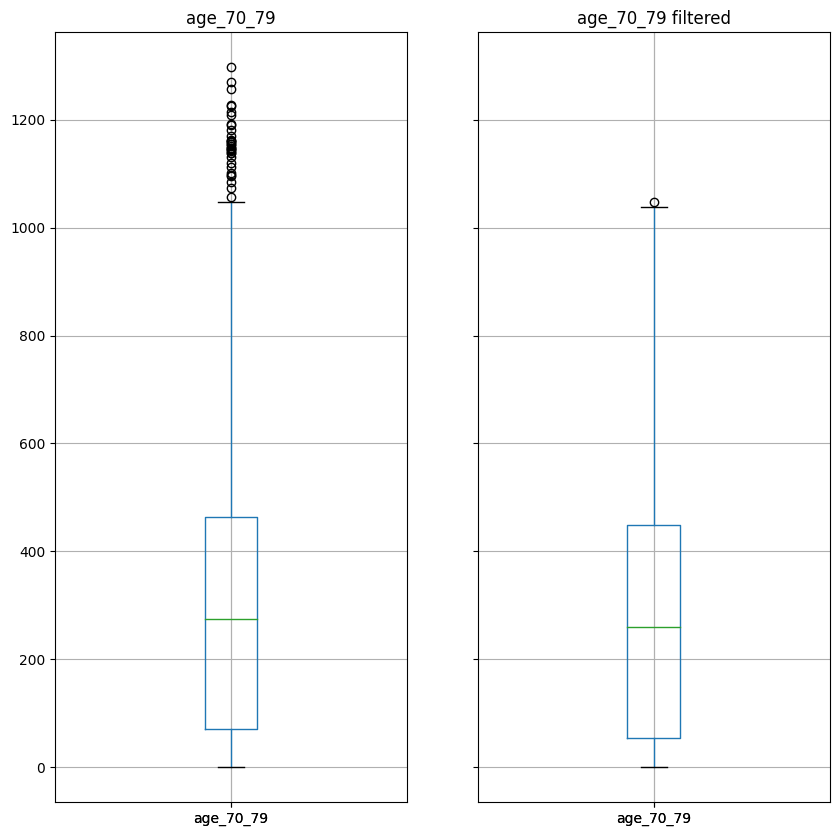

In [10]:
#1.9 ilość chorujących w wieku 70-79
q = ("SELECT date, SUM(new_deceased_age_0) as age_0_9, SUM(new_deceased_age_1) as age_10_19, SUM(new_deceased_age_2) as age_20_29, SUM(new_deceased_age_3) as age_30_39, SUM(new_deceased_age_4) as age_40_49, SUM(new_deceased_age_5) as age_50_59, SUM(new_deceased_age_6) as age_60_69, SUM(new_deceased_age_7) as age_70_79, SUM(new_deceased_age_8) as age_80_89, SUM(new_deceased_age_9) as age_90_99 FROM bigquery-public-data.covid19_open_data.covid19_open_data WHERE aggregation_level = 0 GROUP BY date ORDER BY date")
query_job = client.query(q)
query_result = query_job.result()
df = query_result.to_dataframe().dropna().drop_duplicates()
df

column_name = "age_70_79"
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10), sharex = True, sharey = True)
ax[0].set_title(f"{column_name}")
ax[1].set_title(f"{column_name} after_reduction")
df.boxplot(ax = ax[0], column=column_name)

q1 = df[column_name].quantile(0.25)
q3 = df[column_name].quantile(0.75)
q_difference = q3 - q1
after_reduction = df.query(f'(@q1 - 1.5 * @q_difference) <= {column_name} <= (@q3 + 1.5 * @q_difference)')

after_reduction.boxplot(ax = ax[1], column=column_name)

<Axes: title={'center': 'confirmed_female after_reduction'}>

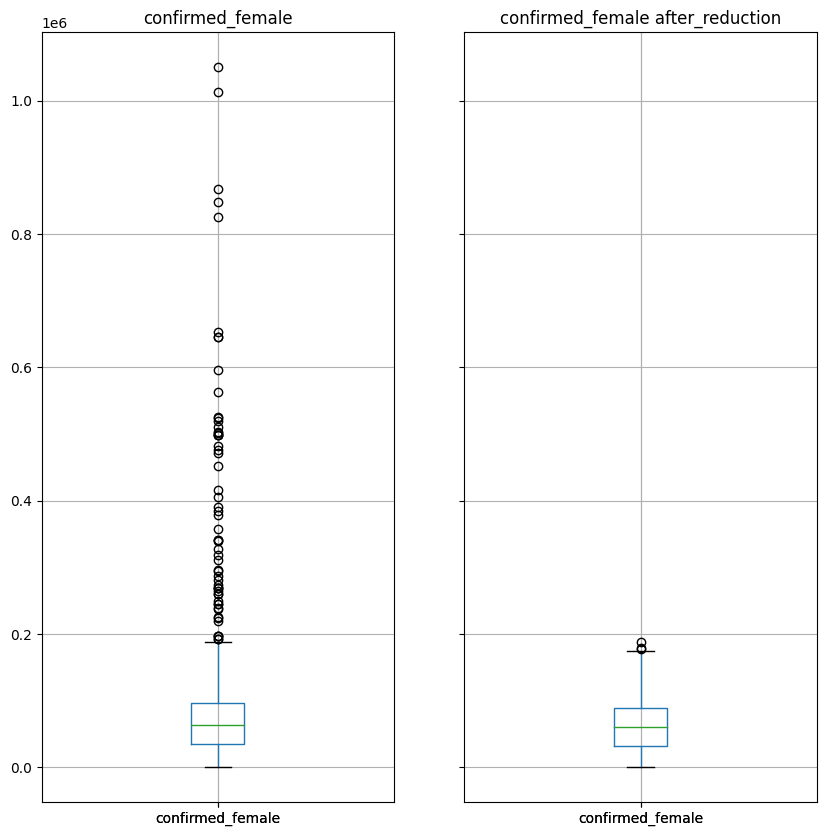

In [5]:
#1.10 ilość potwierdzonych przypadków wśród kobiet
q = ("SELECT date, SUM(new_confirmed_female) as confirmed_female, SUM(new_confirmed_female)/SUM(population)*100 as female_to_population_ratio, SUM(new_confirmed_male) as confirmed_male, SUM(new_confirmed_male)/SUM(population)*100 as male_to_population_ratio FROM `bigquery-public-data.covid19_open_data.covid19_open_data` WHERE new_confirmed_female IS NOT NULL AND new_confirmed_male IS NOT NULL AND aggregation_level = 0 GROUP BY date ORDER BY date")
query_job = client.query(q)
query_result = query_job.result()
df = query_result.to_dataframe().dropna().drop_duplicates()
df

column_name = "confirmed_female"
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10), sharex = True, sharey = True)
ax[0].set_title(f"{column_name}")
ax[1].set_title(f"{column_name} after_reduction")
df.boxplot(ax = ax[0], column=column_name)

q1 = df[column_name].quantile(0.25)
q3 = df[column_name].quantile(0.75)
q_difference = q3 - q1
after_reduction = df.query(f'(@q1 - 1.5 * @q_difference) <= {column_name} <= (@q3 + 1.5 * @q_difference)')

after_reduction.boxplot(ax = ax[1], column=column_name)

In [9]:
# 2.1.1.1 średni wzrost liczby nowych zachorowań na przestrzeni tygodnia 
q = ("SELECT AVG(new_confirmed) AS avg_increase_of_new_cases FROM `bigquery-public-data.covid19_open_data.covid19_open_data` WHERE date BETWEEN '2022-03-15' AND '2022-03-21'")
query_job = client.query(q)
query_result = query_job.result()
query_result.to_dataframe()

,avg_increase_of_new_cases
0,228.571028


In [11]:
# 2.1.1.2 średni wzrost liczby nowych zachorowań na przestrzeni miesiąca 
q = ("SELECT AVG(new_confirmed) AS avg_increase_of_new_cases FROM `bigquery-public-data.covid19_open_data.covid19_open_data` WHERE date BETWEEN '2022-03-01' AND '2022-03-31'")
query_job = client.query(q)
query_result = query_job.result()
query_result.to_dataframe()

,avg_increase_of_new_cases
0,210.28205


In [12]:
# 2.1.1.3 średni wzrost liczby nowych zachorowań na przestrzeni kwartału
q = ("SELECT AVG(new_confirmed) AS avg_increase_of_new_cases FROM `bigquery-public-data.covid19_open_data.covid19_open_data` WHERE date BETWEEN '2022-01-01' AND '2022-03-31'")
query_job = client.query(q)
query_result = query_job.result()
query_result.to_dataframe()

,avg_increase_of_new_cases
0,327.199644


In [19]:
#2.1.2.1 zachorowania, szczepienia i śmiertelność a PKB
q = ("SELECT AVG(new_confirmed) AS avg_increase_of_new_cases, AVG(new_vaccine_doses_administered) AS avg_increase_of_new_vaccinations, AVG(IF(cumulative_confirmed > 0, cumulative_deceased / cumulative_confirmed, NULL)) AS avg_mortality_rate, AVG(gdp_usd) AS avg_gdp FROM `bigquery-public-data.covid19_open_data.covid19_open_data` WHERE new_confirmed IS NOT NULL AND gdp_usd IS NOT NULL AND new_vaccine_doses_administered IS NOT NULL AND cumulative_deceased IS NOT NULL AND cumulative_confirmed IS NOT NULL")
query_job = client.query(q)
query_result = query_job.result()
query_result.to_dataframe()

,avg_increase_of_new_cases,avg_increase_of_new_vaccinations,avg_mortality_rate,avg_gdp
0,5996.540971,179850.397204,0.054564,6.207527e+11


In [29]:
# 2.1.2.2 zachorowania, szczepienia i śmiertelność a populacja krajów 
q = ("""
    SELECT 
  country_name, 
  population,
  SUM(new_confirmed) AS total_new_cases,
  SUM(new_vaccine_doses_administered) AS total_new_vaccine_doses_administered,
  AVG(IF(cumulative_confirmed > 0, cumulative_deceased / cumulative_confirmed, NULL)) AS avg_mortality_rate
FROM 
  `bigquery-public-data.covid19_open_data.covid19_open_data`
WHERE
  aggregation_level = 0 AND
  new_confirmed IS NOT NULL 
  AND new_vaccine_doses_administered IS NOT NULL 
  AND cumulative_confirmed IS NOT NULL 
  AND cumulative_deceased IS NOT NULL 
GROUP BY 
  country_name, 
  population"""
    )
query_job = client.query(q)
query_result = query_job.result()
query_result.to_dataframe()

,country_name,population,total_new_cases,total_new_vaccine_doses_administered,avg_mortality_rate
0,Bolivia,11673029,862347,14498396,0.032716
1,Belize,397621,12633,498803,0.020799
2,Switzerland,8544527,3640499,15993531,0.010328
3,Cuba,11326616,926544,39595964,0.007886
4,Cape Verde,555988,4096,853757,0.008272
...,...,...,...,...,...
213,Costa Rica,5094114,101218,11703936,0.011902
214,Guinea-Bissau,1967998,568,667202,0.021346
215,Sweden,10230185,152463,22968954,0.011821
216,Saint Helena,6071,0,7785,NaN


In [24]:
# 2.1.3 zmiana liczby szczepień na przestrzeni wybranych okresów czasu
q = ("""
    SELECT 
  date,
  new_vaccine_doses_administered - LAG(new_vaccine_doses_administered, 30) OVER (ORDER BY date) AS change_30_days,
  new_vaccine_doses_administered - LAG(new_vaccine_doses_administered, 182) OVER (ORDER BY date) AS change_half_a_year,
  new_vaccine_doses_administered - LAG(new_vaccine_doses_administered, 365) OVER (ORDER BY date) AS change_year
FROM 
  `bigquery-public-data.covid19_open_data.covid19_open_data`
WHERE 
  new_vaccine_doses_administered IS NOT NULL
ORDER BY 
  date DESC
  LIMIT 1000"""
    )
query_job = client.query(q)
query_result = query_job.result()
query_result.to_dataframe()

,date,change_30_days,change_half_a_year,change_year
0,2022-09-16,0,-21,-445370
1,2022-09-15,0,-122,-95
2,2022-09-15,0,0,-2824
3,2022-09-15,0,0,-413
4,2022-09-15,0,-714,-28
...,...,...,...,...
995,2022-09-11,-210837,0,0
996,2022-09-11,0,-30,0
997,2022-09-11,0,-125720,-457
998,2022-09-11,0,0,0


In [29]:
# 2.1.4 efektywność szczepień
q = ("""
    SELECT 
  EXTRACT(YEAR FROM date) AS year,
  AVG(
    CASE 
      WHEN cumulative_persons_vaccinated > 0 THEN 
        new_confirmed / cumulative_persons_vaccinated * 100 
      ELSE 
        0 
    END
  ) AS avg_case_vaccination_effectiveness,
  AVG(
    CASE 
      WHEN cumulative_persons_vaccinated > 0 THEN 
        new_deceased / cumulative_persons_vaccinated * 100 
      ELSE 
        0 
    END
  ) AS avg_mortality_vaccination_effectiveness,
  SUM(new_vaccine_doses_administered) AS new_vaccine_doses_administered,
  SUM(new_confirmed) AS new_confirmed,
  SUM(new_deceased) AS new_deceased,
  SUM(cumulative_persons_fully_vaccinated) AS cumulative_persons_fully_vaccinated,
  SUM(cumulative_persons_vaccinated) - SUM(cumulative_persons_fully_vaccinated) AS partially_vaccinated
FROM 
  `bigquery-public-data.covid19_open_data.covid19_open_data`
WHERE 
  cumulative_persons_vaccinated IS NOT NULL
  AND new_confirmed IS NOT NULL
  AND new_deceased IS NOT NULL
GROUP BY 
  year
ORDER BY 
  year ASC"""
    )
query_job = client.query(q)
query_result = query_job.result()
query_result.to_dataframe()

,year,avg_case_vaccination_effectiveness,avg_mortality_vaccination_effectiveness,new_vaccine_doses_administered,new_confirmed,new_deceased,cumulative_persons_fully_vaccinated,partially_vaccinated
0,2020,67.310377,1.072414,9059933,5669258,85246,368595,54427688
1,2021,6.142632,0.123136,11176985496,296480276,4605771,451192711829,261610707076
2,2022,0.145380,0.000349,2947807247,382408598,1307588,789136085454,112069479846


In [38]:
# 2.1.5. mediana nowych zachorowań, szczepień i zgonów na milion mieszkańców
q = ("""
    WITH population_data AS (
  SELECT
    country_name,
    population
  FROM
    bigquery-public-data.covid19_open_data.covid19_open_data
  WHERE
    date = (SELECT MAX(date) FROM bigquery-public-data.covid19_open_data.covid19_open_data)
    AND aggregation_level = 0
  GROUP BY
    country_name, population
    
),
country_data AS (
  SELECT
    country_name,
    EXTRACT(YEAR FROM date) AS year,
    SUM(new_vaccine_doses_administered) / population AS vaccinations_per_million,
    SUM(new_confirmed) / population AS cases_per_million,
    SUM(new_deceased) / population AS deaths_per_million
  FROM
    bigquery-public-data.covid19_open_data.covid19_open_data
  WHERE
    aggregation_level = 0
  GROUP BY
    country_name,
    year,
    population
)
SELECT
  year,
  APPROX_QUANTILES(vaccinations_per_million, 2)[OFFSET(1)] AS median_vaccinations_per_million,
  APPROX_QUANTILES(cases_per_million, 2)[OFFSET(1)] AS median_cases_per_million,
  APPROX_QUANTILES(deaths_per_million, 2)[OFFSET(1)] AS median_deaths_per_million
FROM
  country_data
JOIN
  population_data
ON
  country_data.country_name = population_data.country_name
GROUP BY
  year
ORDER BY
  year"""
    )
query_job = client.query(q)
query_result = query_job.result()
query_result.to_dataframe()

,year,median_vaccinations_per_million,median_cases_per_million,median_deaths_per_million
0,2020,0.000747,0.005109,0.000075
1,2021,1.031508,0.039925,0.000383
2,2022,0.282686,0.045499,0.000149


In [40]:
# 2.1.6. odchylenie standardowe wzrostu lub spadku liczby nowych zachorowań / szczepień / zgonów
# STDDEV - standard deviation of a set of numbers
q = ("""
    WITH data AS (
  SELECT 
    country_name, 
    date, 
    new_confirmed, 
    new_vaccine_doses_administered, 
    new_deceased,
    population,
    LAG(new_confirmed) OVER (PARTITION BY country_name ORDER BY date) AS prev_cases,
    LAG(new_vaccine_doses_administered) OVER (PARTITION BY country_name ORDER BY date) AS prev_vaccinations,
    LAG(new_deceased) OVER (PARTITION BY country_name ORDER BY date) AS prev_deaths
  FROM `bigquery-public-data.covid19_open_data.covid19_open_data`
  WHERE country_name IS NOT NULL 
    AND new_confirmed IS NOT NULL 
    AND new_vaccine_doses_administered IS NOT NULL 
    AND new_deceased IS NOT NULL
)
SELECT 
  country_name,
  STDDEV((new_confirmed - prev_cases) / population) AS cases_stddev_per_million,
  STDDEV((new_vaccine_doses_administered - prev_vaccinations) / population) AS vaccinations_stddev_per_million,
  STDDEV((new_deceased - prev_deaths) / population) AS deaths_stddev_per_million
FROM data
GROUP BY country_name"""
    )
query_job = client.query(q)
query_result = query_job.result()
query_result.to_dataframe()

,country_name,cases_stddev_per_million,vaccinations_stddev_per_million,deaths_stddev_per_million
0,Nauru,0.007784,0.321814,0.000000e+00
1,Cuba,0.000054,0.006101,6.324105e-07
2,Peru,0.000119,0.002074,8.387134e-07
3,India,0.092270,3.074249,9.694130e-04
4,Panama,0.000257,0.010982,1.292632e-06
...,...,...,...,...
213,Brazil,0.007966,0.108054,1.528796e-04
214,Lithuania,0.000300,0.002259,1.850487e-06
215,Rwanda,0.000032,0.076865,2.197695e-07
216,Angola,0.000011,0.007514,1.146545e-07


In [66]:
# 3.1.1 liczba zachorowań na 100 osób      
q = ("""
    SELECT 
  EXTRACT(YEAR FROM date) AS year, 
  SUM(new_confirmed) / SUM(population) * 100 AS cases_per_100_people 
FROM 
  `bigquery-public-data.covid19_open_data.covid19_open_data` 
WHERE 
  new_confirmed IS NOT NULL AND population IS NOT NULL 
GROUP BY 
  year 
ORDER BY 
  year ASC"""
    )

query_job = client.query(q)
query_result = query_job.result()
query_result.to_dataframe()


,year,cases_per_100_people
0,2020,0.004361
1,2021,0.009426
2,2022,0.019129


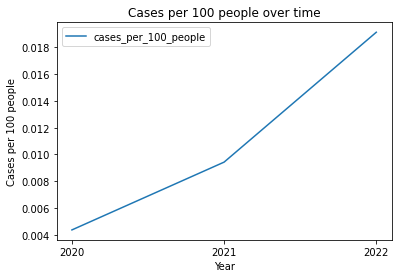

In [74]:
 q = ("""
    SELECT 
  EXTRACT(YEAR FROM date) AS year, 
  SUM(new_confirmed) / SUM(population) * 100 AS cases_per_100_people 
FROM 
  `bigquery-public-data.covid19_open_data.covid19_open_data` 
WHERE 
  new_confirmed IS NOT NULL AND population IS NOT NULL 
GROUP BY 
  year 
ORDER BY 
  year ASC"""
    )

query_job = client.query(q)
query_result = query_job.result()
df = query_result.to_dataframe()

# Create the line plot
df.plot(x="year", y="cases_per_100_people", kind="line")
plt.xticks(range(2020,2023))
plt.title("Cases per 100 people over time")
plt.xlabel("Year")
plt.ylabel("Cases per 100 people")
plt.show()

In [50]:
# 3.1.2 liczba szczepień na 100 osób      
q = ("""
    SELECT 
  EXTRACT(YEAR FROM date) AS year, 
  SUM(new_vaccine_doses_administered) / SUM(population) * 100 AS vaccinations_per_100_people 
FROM 
  `bigquery-public-data.covid19_open_data.covid19_open_data` 
WHERE 
  new_vaccine_doses_administered IS NOT NULL AND population IS NOT NULL 
GROUP BY 
  year 
ORDER BY 
  year ASC"""
    )
query_job = client.query(q)
query_result = query_job.result()
query_result.to_dataframe()

,year,vaccinations_per_100_people
0,2020,0.068814
1,2021,0.516716
2,2022,0.222949


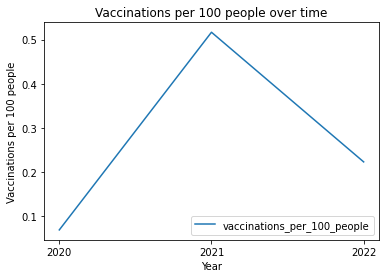

In [75]:
q = ("""
    SELECT 
  EXTRACT(YEAR FROM date) AS year, 
  SUM(new_vaccine_doses_administered) / SUM(population) * 100 AS vaccinations_per_100_people 
FROM 
  `bigquery-public-data.covid19_open_data.covid19_open_data` 
WHERE 
  new_vaccine_doses_administered IS NOT NULL AND population IS NOT NULL 
GROUP BY 
  year 
ORDER BY 
  year ASC"""
    )

query_job = client.query(q)
query_result = query_job.result()
df = query_result.to_dataframe()

df.plot(x="year", y="vaccinations_per_100_people", kind="line")
plt.xticks(range(2020,2023))
plt.title("Vaccinations per 100 people over time")
plt.xlabel("Year")
plt.ylabel("Vaccinations per 100 people")
plt.show()

In [53]:
# 3.1.3. liczba zgonów na 100 osób
q = ("""
    SELECT 
  EXTRACT(YEAR FROM date) AS year, 
  SUM(new_deceased) / SUM(population) * 100 AS deaths_per_100_people 
FROM 
  `bigquery-public-data.covid19_open_data.covid19_open_data` 
WHERE 
  new_deceased IS NOT NULL AND population IS NOT NULL 
GROUP BY 
  year 
ORDER BY 
  year ASC"""
    )
query_job = client.query(q)
query_result = query_job.result()
query_result.to_dataframe()

,year,deaths_per_100_people
0,2020,0.000098
1,2021,0.000158
2,2022,0.000065


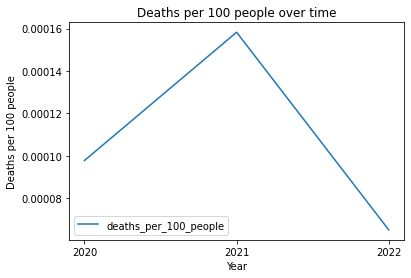

In [76]:
q = ("""
    SELECT 
  EXTRACT(YEAR FROM date) AS year, 
  SUM(new_deceased) / SUM(population) * 100 AS deaths_per_100_people 
FROM 
  `bigquery-public-data.covid19_open_data.covid19_open_data` 
WHERE 
  new_deceased IS NOT NULL AND population IS NOT NULL 
GROUP BY 
  year 
ORDER BY 
  year ASC"""
    )
query_job = client.query(q)
query_result = query_job.result()
df = query_result.to_dataframe()

df.plot(x="year", y="deaths_per_100_people", kind="line")
plt.xticks(range(2020,2023))
plt.title("Deaths per 100 people over time")
plt.xlabel("Year")
plt.ylabel("Deaths per 100 people")
plt.show()

In [5]:
# 3.2.1 liczba ozdrowiencow na 100 osób
q = ("""
    SELECT 
  EXTRACT(YEAR FROM date) AS year, 
  SUM(new_recovered) / SUM(population) * 100 AS recovered_per_100_people 
FROM 
  `bigquery-public-data.covid19_open_data.covid19_open_data` 
WHERE 
  new_recovered IS NOT NULL AND population IS NOT NULL 
GROUP BY 
  year 
ORDER BY 
  year ASC"""
    )
query_job = client.query(q)
query_result = query_job.result()
query_result.to_dataframe()

,year,recovered_per_100_people
0,2020,0.005951
1,2021,0.020389
2,2022,0.012587


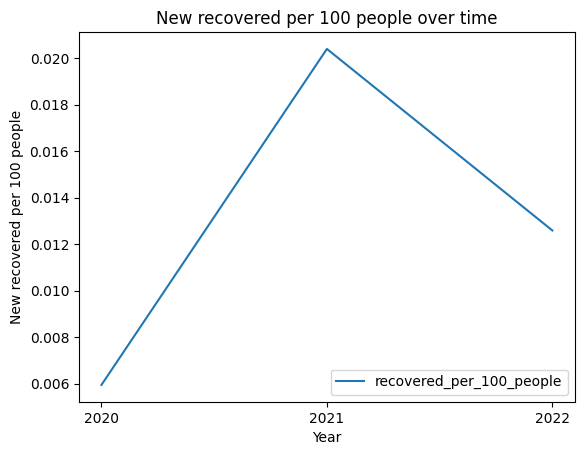

In [6]:
# 3.2.1
q = ("""
    SELECT 
  EXTRACT(YEAR FROM date) AS year, 
  SUM(new_recovered) / SUM(population) * 100 AS recovered_per_100_people 
FROM 
  `bigquery-public-data.covid19_open_data.covid19_open_data` 
WHERE 
  new_recovered IS NOT NULL AND population IS NOT NULL 
GROUP BY 
  year 
ORDER BY 
  year ASC"""
    )
query_job = client.query(q)
query_result = query_job.result()
df = query_result.to_dataframe()

df.plot(x="year", y="recovered_per_100_people", kind="line")
plt.xticks(range(2020,2023))
plt.title("New recovered per 100 people over time")
plt.xlabel("Year")
plt.ylabel("New recovered per 100 people")
plt.show()

In [10]:
# 3.2.2 Nowi przetestowani na 100 osób
q = ("""
    SELECT 
  EXTRACT(YEAR FROM date) AS year, 
  SUM(CAST(new_tested as INT)) / SUM(population) * 100 AS new_tested_per_100_people 
FROM 
  `bigquery-public-data.covid19_open_data.covid19_open_data` 
WHERE 
  new_tested IS NOT NULL AND population IS NOT NULL 
GROUP BY 
  year 
ORDER BY 
  year ASC"""
    )
query_job = client.query(q)
query_result = query_job.result()
query_result.to_dataframe()

,year,new_tested_per_100_people
0,2020,0.073995
1,2021,0.157003
2,2022,0.144964


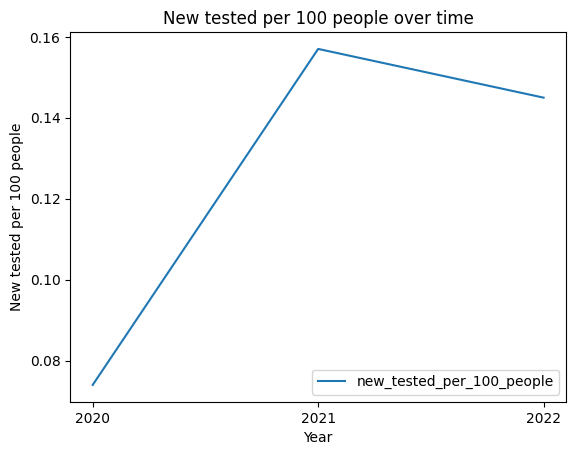

In [16]:
# 3.2.2
q = ("""
    SELECT 
  EXTRACT(YEAR FROM date) AS year, 
  SUM(CAST(new_tested as INT)) / SUM(population) * 100 AS new_tested_per_100_people 
FROM 
  `bigquery-public-data.covid19_open_data.covid19_open_data` 
WHERE 
  new_tested IS NOT NULL AND population IS NOT NULL 
GROUP BY 
  year 
ORDER BY 
  year ASC"""
    )
query_job = client.query(q)
query_result = query_job.result()
df = query_result.to_dataframe()

df.plot(x="year", y="new_tested_per_100_people", kind="line")
plt.xticks(range(2020,2023))
plt.title("New tested per 100 people over time")
plt.xlabel("Year")
plt.ylabel("New tested per 100 people")
plt.show()

In [17]:
# 3.2.3 Ilości zaszczepionych konkretnymi szczepionkami na 100 osób
q = ("""
    SELECT 
  EXTRACT(YEAR FROM date) AS year, 
  SUM(new_vaccine_doses_administered_janssen) / SUM(population) * 100 AS janssen_per_100_people,
  SUM(new_vaccine_doses_administered_moderna) / SUM(population) * 100 AS moderna_per_100_people, 
  SUM(new_vaccine_doses_administered_pfizer) / SUM(population) * 100 AS pfizer_per_100_people 
FROM 
  `bigquery-public-data.covid19_open_data.covid19_open_data` 
WHERE 
  new_vaccine_doses_administered_janssen IS NOT NULL AND
  new_vaccine_doses_administered_moderna IS NOT NULL AND
  new_vaccine_doses_administered_pfizer IS NOT NULL AND
  population IS NOT NULL 
GROUP BY 
  year 
ORDER BY 
  year ASC"""
    )
query_job = client.query(q)
query_result = query_job.result()
query_result.to_dataframe()

,year,janssen_per_100_people,moderna_per_100_people,pfizer_per_100_people
0,2021,0.017412,0.149368,0.250178
1,2022,0.001563,0.044392,0.080428


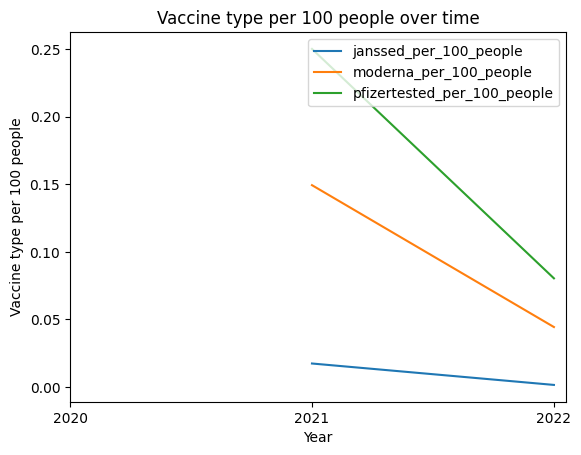

In [18]:
# 3.2.3
q = ("""
    SELECT 
  EXTRACT(YEAR FROM date) AS year, 
  SUM(new_vaccine_doses_administered_janssen) / SUM(population) * 100 AS janssed_per_100_people,
  SUM(new_vaccine_doses_administered_moderna) / SUM(population) * 100 AS moderna_per_100_people, 
  SUM(new_vaccine_doses_administered_pfizer) / SUM(population) * 100 AS pfizertested_per_100_people 
FROM 
  `bigquery-public-data.covid19_open_data.covid19_open_data` 
WHERE 
  new_vaccine_doses_administered_janssen IS NOT NULL AND
  new_vaccine_doses_administered_moderna IS NOT NULL AND
  new_vaccine_doses_administered_pfizer IS NOT NULL AND
  population IS NOT NULL 
GROUP BY 
  year 
ORDER BY 
  year ASC"""
    )
query_job = client.query(q)
query_result = query_job.result()
df = query_result.to_dataframe()

df.plot(x="year", y=["janssed_per_100_people", "moderna_per_100_people", "pfizertested_per_100_people"], kind="line")
plt.xticks(range(2020,2023))
plt.title("Vaccine type per 100 people over time")
plt.xlabel("Year")
plt.ylabel("Vaccine type per 100 people")
plt.show()

In [7]:
# 4.1.1 Oblicz współczynnik korelacji między liczbą nowych zachorowań / szczepień / zgonów, a liczbą nowych zachorowań / szczepień / zgonów

q = """
SELECT 
  date,
  SUM(new_confirmed) AS new_confirmed,
  SUM(new_vaccine_doses_administered) AS new_vaccine_doses_administered,
  SUM(new_deceased) AS new_deceased
FROM 
  `bigquery-public-data.covid19_open_data.covid19_open_data` 
WHERE 
  new_confirmed IS NOT NULL AND 
  new_vaccine_doses_administered IS NOT NULL AND
  new_deceased IS NOT NULL
GROUP BY 
  date
"""

# Run the query and store the results in a dataframe
query_job = client.query(q)
query_result = query_job.result()
df = query_result.to_dataframe()

# Drop the date column as it is not needed for calculating correlation coefficients
df = df.drop('date', axis=1)

# Calculate correlation coefficients and create a correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

# Wartości korelacji wynoszą:
#  1.000000 dla zmiennych `new_confirmed`, 'new_vaccine_doses_administered', 'new_deceased' (główna przekątna macierzy)
#  0.263278 dla 'new_vaccine_doses_administered' i `new_confirmed` - lekka pozytywna zależność, może to oznaczać, że państwa z większą ilością nowych zachorowań przydzielają też więcej nowych szczepionek (i na odwrót).
#  0.485638 dla 'new_deceased' i `new_confirmed` - pozytywna zależność, może to oznaczać, że państwa z większą ilością nowych zgonów mają też większe ilości nowych potwierdzonych przypadków (i na odwrót).
#  0.547066 dla 'new_vaccine_doses_administered' i 'new_deceased' -  pozytywna zależność, może to oznaczać, że państwa z większą ilością nowych szczepień mają też więcej nowych zgonów (i na odwrót).

                                new_confirmed  new_vaccine_doses_administered  \
new_confirmed                        1.000000                        0.263278   
new_vaccine_doses_administered       0.263278                        1.000000   
new_deceased                         0.485638                        0.547066   

                                new_deceased  
new_confirmed                       0.485638  
new_vaccine_doses_administered      0.547066  
new_deceased                        1.000000  


In [10]:
# 4.1.2 Oblicz współczynnik korelacji między liczbą nowych zachorowań / szczepień / zgonów, a liczbą łącznych zachorowań / szczepień / zgonów

q = """
SELECT 
  date,
  SUM(new_confirmed) AS new_confirmed,
  SUM(cumulative_confirmed) AS total_confirmed,
  SUM(new_vaccine_doses_administered) AS new_vaccine_doses_administered,
  SUM(cumulative_vaccine_doses_administered) AS total_vaccine_doses_administered,
  SUM(new_deceased) AS new_deceased,
  SUM(cumulative_deceased) AS total_deceased
FROM 
  `bigquery-public-data.covid19_open_data.covid19_open_data` 
WHERE 
  new_confirmed IS NOT NULL AND 
  cumulative_confirmed IS NOT NULL AND
  new_vaccine_doses_administered IS NOT NULL AND
  cumulative_vaccine_doses_administered IS NOT NULL AND
  new_deceased IS NOT NULL AND
  cumulative_deceased IS NOT NULL
GROUP BY 
  date
"""

# Run the query and store the results in a dataframe
query_job = client.query(q)
query_result = query_job.result()
df = query_result.to_dataframe()

# Drop the date column as it is not needed for calculating correlation coefficients
df = df.drop('date', axis=1)

rows = ['new_confirmed', 'new_vaccine_doses_administered', 'new_deceased']
columns = ['total_confirmed', 'total_vaccine_doses_administered', 'total_deceased']

# Calculate correlation coefficients and create a correlation matrix
corr_matrix = df.corr().loc[rows, columns]

# Print the correlation matrix
print(corr_matrix)

# Wartości korelacji wynoszą:
#  1.000000 dla zmiennych na głównej przekątnej macierzy
#  0.557432 dla 'new_confirmed' i `total_confirmed` - pozytywna zależność, może to oznaczać, że państwa z większą ilością nowych zachorowań mają też więcej całkowitych zachorowań (i na odwrót).
#  0.577615 dla 'new_confirmed' i `total_vaccine_doses_administered` - pozytywna zależność, może to oznaczać, że państwa z większą ilością nowych zachorowań mają też więcej całkowitych przydzielonych szczepionek (i na odwrót).
#  0.613319 dla 'new_confirmed' i 'total_deceased  ' -  pozytywna zależność, może to oznaczać, że państwa z większą ilością nowych zachorowań mają też więcej całkowitych zgonów (i na odwrót).
#  0.194950 dla 'new_vaccine_doses_administered' i 'total_confirmed' - lekka pozytywna zależność, może to oznaczać, że państwa z większą ilością nowych zaszczepień mają też więcej całkowitych zachorowań (i na odwrót).
#  0.174090 dla 'new_vaccine_doses_administered' i `total_vaccine_doses_administered` - lekka pozytywna zależność, może to oznaczać, że państwa z większą ilością nowych zaszczepień mają też więcej całkowitych przydzielonych szczepionek (i na odwrót).
#  0.427464 dla 'new_vaccine_doses_administered' i 'total_deceased  ' -  pozytywna zależność, może to oznaczać, że państwa z większą ilością nowych zaszczepień mają też więcej całkowitych zgonów (i na odwrót).
#  0.213587 dla 'new_deceased' i 'total_confirmed' - lekka pozytywna zależność, może to oznaczać, że państwa z większą ilością nowych zgonów mają też więcej całkowitych zachorowań (i na odwrót).
#  0.095108 dla 'new_deceased' i `total_vaccine_doses_administered` - lekka pozytywna zależność, może to oznaczać, że państwa z większą ilością nowych zgonów mają też więcej całkowitych przydzielonych szczepionek (i na odwrót).
#  0.508793 dla 'new_deceased' i 'total_deceased  ' -  pozytywna zależność, może to oznaczać, że państwa z większą ilością nowych zgonów mają też więcej całkowitych zgonów (i na odwrót).

                                total_confirmed  \
new_confirmed                          0.557432   
new_vaccine_doses_administered         0.194950   
new_deceased                           0.213587   

                                total_vaccine_doses_administered  \
new_confirmed                                           0.577615   
new_vaccine_doses_administered                          0.174090   
new_deceased                                            0.095108   

                                total_deceased  
new_confirmed                         0.613319  
new_vaccine_doses_administered        0.427464  
new_deceased                          0.508793  


In [11]:
# 4.1.3 Oblicz współczynnik korelacji między wskaźnikami gospodarczymi, a liczbą nowych zachorowań / szczepień / zgonów

q = """
SELECT 
  date,
  population,
  gdp_per_capita_usd,
  SUM(new_confirmed) AS new_confirmed,
  SUM(new_vaccine_doses_administered) AS new_vaccine_doses_administered,
  SUM(new_deceased) AS new_deceased,
FROM 
  `bigquery-public-data.covid19_open_data.covid19_open_data` 
WHERE 
  new_confirmed IS NOT NULL AND 
  new_vaccine_doses_administered IS NOT NULL AND
  new_deceased IS NOT NULL AND
  population IS NOT NULL AND
  gdp_per_capita_usd IS NOT NULL
GROUP BY 
  date, population, gdp_per_capita_usd
"""

# Run the query and store the results in a dataframe
query_job = client.query(q)
query_result = query_job.result()
df = query_result.to_dataframe()

rows = ['population', 'gdp_per_capita_usd']
columns = ['new_confirmed', 'new_vaccine_doses_administered', 'new_deceased']

# Calculate correlation coefficients and create a correlation matrix
corr_matrix = df.corr().loc[rows, columns]

# Print the correlation matrix
print(corr_matrix)


# Wartości korelacji wynoszą:
#  1.000000 dla zmiennych na głównej przekątnej macierzy
#  0.238582 dla 'population' i `new_confirmed` - lekka pozytywna zależność, może to oznaczać, że państwa z większą populacją mają więcej nowych zachorowań (i na odwrót).
#  0.485548 dla 'population' i `new_vaccine_doses_administered` - lekka pozytywna zależność, może to oznaczać, że państwa z większą populacją mają też więcej nowych przydzielonych szczepionek (i na odwrót).
#  0.287566 dla 'population' i `new_deceased` - lekka pozytywna zależność, może to oznaczać, że państwa z większą populacją mają też więcej nowych zgonów (i na odwrót).
#  0.048687 dla 'gdp_per_capita_usd' i `new_confirmed` - mała pozytywna zależność, może to oznaczać, że państwa z większym GDP mają też więcej nowych zachorowań (i na odwrót).
#  -0.062606 dla 'gdp_per_capita_usd' i `new_vaccine_doses_administered` - negatywna zależność, może to oznaczać, że państwa z większym GDP mają mniej nowych przydzielonych szczepionek (i na odwrót).
#  -0.030248 dla 'gdp_per_capita_usd' i `new_deceased` - negatywna zależność, może to oznaczać, że państwa z większym GDP mają mniej nowych zgonów (i na odwrót).

                    new_confirmed  new_vaccine_doses_administered  \
population               0.238582                        0.485548   
gdp_per_capita_usd       0.048687                       -0.062606   

                    new_deceased  
population              0.287566  
gdp_per_capita_usd     -0.030248  


In [12]:
# 4.1.4. Oblicz współczynnik korelacji między parametrami demograficznymi, a liczbą nowych zachorowań / szczepień / zgonów.

q = """
SELECT 
  human_development_index,
  infant_mortality_rate,
  SUM(new_confirmed) AS new_confirmed,
  SUM(new_vaccine_doses_administered) AS new_vaccine_doses_administered,
  SUM(new_deceased) AS new_deceased
FROM 
  `bigquery-public-data.covid19_open_data.covid19_open_data` 
WHERE 
  new_confirmed IS NOT NULL AND 
  new_vaccine_doses_administered IS NOT NULL AND
  new_deceased IS NOT NULL AND
  human_development_index IS NOT NULL AND
  infant_mortality_rate IS NOT NULL
GROUP BY 
  human_development_index, infant_mortality_rate
"""

# Run the query and store the results in a dataframe
query_job = client.query(q)
query_result = query_job.result()
df = query_result.to_dataframe()

rows = ['human_development_index', 'infant_mortality_rate']
columns = ['new_confirmed', 'new_vaccine_doses_administered', 'new_deceased']

# Calculate correlation coefficients and create a correlation matrix
corr_matrix = df.corr().loc[rows, columns]

# Print the correlation matrix
print(corr_matrix)

# Wartości korelacji wynoszą:
#  1.000000 dla zmiennych na głównej przekątnej macierzy
#  0.308129 dla 'human_development_index' i `new_confirmed` - lekka pozytywna zależność, może to oznaczać, że państwa z większym wskaźnikiem rozwoju społecznego mają więcej nowych zachorowań (i na odwrót).
#  0.055745 dla 'human_development_index' i `new_vaccine_doses_administered` - mała pozytywna zależność, może to oznaczać, że państwa z większym wskaźnikiem rozwoju społecznego mają więcej nowych przydzielonych szczepionek (i na odwrót).
#  0.198176 dla 'human_development_index' i `new_deceased` - lekka pozytywna zależność, może to oznaczać, że państwa z większym wskaźnikiem rozwoju społecznego mają więcej nowych zgonów (i na odwrót).
#  -0.225066 dla 'infant_mortality_rate' i `new_confirmed` - negatywna zależność, może to oznaczać, że państwa z większym wskaźnikiem śmiertelności noworodków mają mniej nowych zachorowań (i na odwrót).
#  -0.066296 dla 'infant_mortality_rate' i `new_vaccine_doses_administered` - negatywna zależność, może to oznaczać, że państwa z większym wskaźnikiem śmiertelności noworodków mają mniej nowych przydzielonych szczepionek (i na odwrót).
#  -0.163182 dla 'infant_mortality_rate' i `new_deceased` - negatywna zależność, może to oznaczać, że państwa z większym wskaźnikiem śmiertelności noworodków mają mniej nowych zgonów (i na odwrót).

                         new_confirmed  new_vaccine_doses_administered  \
human_development_index       0.308129                        0.055745   
infant_mortality_rate        -0.225066                       -0.066296   

                         new_deceased  
human_development_index      0.198176  
infant_mortality_rate       -0.163182  


In [22]:
#4.2.1
# Macierz korelacji przedstawia zależność liniową między dwiema zmiennymi: `new_confirmed` (nowe potwierdzone przypadki zakażenia) oraz `new_hospitalized_patients` (nowi hospitalizowani pacjenci).

# Wartości korelacji wynoszą:
#  0.026086 dla zmiennej `new_hospitalized_patients` - oznacza to, że istnieje silna pozytywna zależność liniowa między zmiennymi. Wartość korelacji zbliżona jest do 1, co wskazuje na to, że im większa liczba nowych hospitalizowanych pacjentów, tym większa liczba nowych potwierdzonych przypadków zakażenia.
# (...)

q = """
SELECT 
  date,
  SUM(new_confirmed) AS new_confirmed,
  SUM(new_vaccine_doses_administered) AS new_vaccine_doses_administered,
  SUM(new_deceased) AS new_deceased,
  SUM(new_hospitalized_patients) AS new_hospitalized_patients
FROM 
  `bigquery-public-data.covid19_open_data.covid19_open_data` 
WHERE 
  new_confirmed IS NOT NULL AND 
  new_vaccine_doses_administered IS NOT NULL AND
  new_deceased IS NOT NULL AND
  new_hospitalized_patients IS NOT NULL
GROUP BY 
  date
"""

# Run the query and store the results in a dataframe
query_job = client.query(q)
query_result = query_job.result()
df = query_result.to_dataframe()

# Drop the date column as it is not needed for calculating correlation coefficients
df = df.drop('date', axis=1)

rows = ['new_confirmed', 'new_vaccine_doses_administered', 'new_deceased']
columns = ['new_hospitalized_patients']

# Calculate correlation coefficients and create a correlation matrix
corr_matrix = df.corr().loc[rows, columns]

# Print the correlation matrix
print(corr_matrix)

                                new_hospitalized_patients
new_confirmed                                    0.026086
new_vaccine_doses_administered                  -0.141023
new_deceased                                    -0.349249


In [23]:
#4.2.2
# Macierz korelacji przedstawia zależność liniową między dwiema zmiennymi: `new_confirmed` (nowe potwierdzone przypadki zakażenia) oraz `new_recovered` (nowi wyzdrowieńcy).

# Wartości korelacji wynoszą:
#  0.428821 dla zmiennej `new_recovered` - oznacza to, że istnieje pozytywna zależność liniowa między zmiennymi. Wartość korelacji jest znacznie mniejsza niż 1, co wskazuje na to, że zwiększenie liczby nowych potwierdzonych przypadków zakażenia nie prowadzi wprost do większej liczby nowych wyzdrowieńców.
# (...)

q = """
SELECT 
  date,
  SUM(new_confirmed) AS new_confirmed,
  SUM(new_vaccine_doses_administered) AS new_vaccine_doses_administered,
  SUM(new_deceased) AS new_deceased,
  SUM(new_recovered) AS new_recovered
FROM 
  `bigquery-public-data.covid19_open_data.covid19_open_data` 
WHERE 
  new_confirmed IS NOT NULL AND
  new_vaccine_doses_administered IS NOT NULL AND
  new_deceased IS NOT NULL AND
  new_recovered IS NOT NULL
GROUP BY 
  date
"""

# Run the query and store the results in a dataframe
query_job = client.query(q)
query_result = query_job.result()
df = query_result.to_dataframe()

# Drop the date column as it is not needed for calculating correlation coefficients
df = df.drop('date', axis=1)

rows = ['new_confirmed', 'new_vaccine_doses_administered', 'new_deceased']
columns = ['new_recovered']

# Calculate correlation coefficients and create a correlation matrix
corr_matrix = df.corr().loc[rows, columns]

# Print the correlation matrix
print(corr_matrix)

                                new_recovered
new_confirmed                        0.428821
new_vaccine_doses_administered       0.571062
new_deceased                         0.496208


In [25]:
#4.2.3
# Macierz korelacji przedstawia zależność liniową między dwiema zmiennymi: `new_confirmed` (nowe potwierdzone przypadki zakażenia) oraz `new_intensive_care_patients` (nowi pacjenci w stanie ciężkim wymagający intensywnej opieki).

# Wartości korelacji wynoszą:
#  0.144040 dla zmiennej `new_intensive_care_patients` - oznacza to, że istnieje słaba dodatnia zależność liniowa między zmiennymi. Wartość korelacji jest stosunkowo niska, co wskazuje na to, że liczba nowych potwierdzonych przypadków zakażenia nie wpływa bezpośrednio na liczbę nowych pacjentów w stanie ciężkim wymagających intensywnej opieki.
# (...)

q = """
SELECT 
  date,
  SUM(new_confirmed) AS new_confirmed,
  SUM(new_vaccine_doses_administered) AS new_vaccine_doses_administered,
  SUM(new_deceased) AS new_deceased,
  SUM(new_intensive_care_patients) AS new_intensive_care_patients
FROM 
  `bigquery-public-data.covid19_open_data.covid19_open_data` 
WHERE 
  new_confirmed IS NOT NULL AND 
  new_vaccine_doses_administered IS NOT NULL AND
  new_deceased IS NOT NULL AND
  new_intensive_care_patients IS NOT NULL
GROUP BY 
  date
"""

# Run the query and store the results in a dataframe
query_job = client.query(q)
query_result = query_job.result()
df = query_result.to_dataframe()

# Drop the date column as it is not needed for calculating correlation coefficients
df = df.drop('date', axis=1)

rows = ['new_confirmed', 'new_vaccine_doses_administered', 'new_deceased']
columns = ['new_intensive_care_patients']

# Calculate correlation coefficients and create a correlation matrix
corr_matrix = df.corr().loc[rows, columns]
# Print the correlation matrix
print(corr_matrix)

                                new_intensive_care_patients
new_confirmed                                      0.144040
new_vaccine_doses_administered                     0.155760
new_deceased                                       0.838557


In [28]:
#4.2.4
# Macierz korelacji przedstawia zależność liniową między dwiema zmiennymi: `new_deceased` (nowe zgony) oraz `new_intensive_care_patients` (nowi pacjenci w stanie ciężkim).

# Wartości korelacji wynoszą:
#  -0.503181 dla zmiennej `new_deceased` - oznacza to, że istnieje ujemna zależność liniowa między zmiennymi. Wartość korelacji zbliżona jest do 1, co wskazuje na to, że im większa liczba nowych pacjentów w stanie ciężkim, tym większa liczba nowych zgonów.
# (...)

q = """
SELECT 
  date,
  physicians_per_1000,
  SUM(new_deceased) AS new_deceased,
  SUM(new_intensive_care_patients) AS new_intensive_care_patients
FROM 
  `bigquery-public-data.covid19_open_data.covid19_open_data` 
WHERE 
  physicians_per_1000 IS NOT NULL AND
  new_deceased IS NOT NULL AND 
  new_intensive_care_patients IS NOT NULL
GROUP BY 
  date, physicians_per_1000
"""

# Run the query and store the results in a dataframe
query_job = client.query(q)
query_result = query_job.result()
df = query_result.to_dataframe()

# Drop the date column as it is not needed for calculating correlation coefficients
df = df.drop('date', axis=1)

rows = ['physicians_per_1000']
columns = ['new_deceased', 'new_intensive_care_patients']

# Calculate correlation coefficients and create a correlation matrix
corr_matrix = df.corr().loc[rows, columns]

# Print the correlation matrix
print(corr_matrix)

                     new_deceased  new_intensive_care_patients
physicians_per_1000     -0.503181                    -0.403811


In [27]:
#4.2.5
# Macierz korelacji przedstawia zależność liniową między dwiema zmiennymi: `new_recovered` (nowi wyzdrowiali z COVID-19) oraz `new_intensive_care_patients` (nowi pacjenci w stanie ciężkim wymagający intensywnej opieki).

# Wartości korelacji wynoszą:
#  0.017178 dla zmiennej `new_recovered` - oznacza to, że istnieje bardzo słaba ujemna zależność liniowa między zmiennymi. Wartość korelacji jest bardzo niska, co wskazuje na to, że liczba nowych pacjentów w stanie ciężkim wymagających intensywnej opieki nie ma bezpośredniego wpływu na liczbę nowych wyzdrowiałych z COVID-19.

q = """
SELECT 
  date,
  school_closing,
  SUM(new_confirmed) AS new_confirmed,
  SUM(new_vaccine_doses_administered) AS new_vaccine_doses_administered,
  SUM(new_deceased) AS new_deceased,
  SUM(new_recovered) AS new_recovered
FROM 
  `bigquery-public-data.covid19_open_data.covid19_open_data` 
WHERE 
  new_recovered IS NOT NULL AND
  school_closing IS NOT NULL AND
  new_confirmed IS NOT NULL AND 
  new_vaccine_doses_administered IS NOT NULL AND
  new_deceased IS NOT NULL
GROUP BY 
  date, school_closing
"""

# Run the query and store the results in a dataframe
query_job = client.query(q)
query_result = query_job.result()
df = query_result.to_dataframe()

# Drop the date column as it is not needed for calculating correlation coefficients
df = df.drop('date', axis=1)

rows = ['school_closing']
columns = ['new_recovered', 'new_confirmed', 'new_vaccine_doses_administered', 'new_deceased']

# Calculate correlation coefficients and create a correlation matrix
corr_matrix = df.corr().loc[rows, columns]

# Print the correlation matrix
print(corr_matrix)

                new_recovered  new_confirmed  new_vaccine_doses_administered  \
school_closing       -0.18689       0.205419                        0.419565   

                new_deceased  
school_closing      0.456927  
